# ProDomino Example Notebook

In [1]:
import numpy as np
import os
import sys
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False, 'axes.linewidth': 1}
sns.set_theme(context="paper",
              style='ticks',
              palette="Blues_r", rc=custom_params)
lw = 1
lw = 1
fs = 6
hi = 6.69291
wi = 7.08661
nr = 5

sns.set_context("paper", rc={"font.size": fs,
                             "axes.titlesize": fs + 1,
                             "axes.labelsize": fs,
                             'axes.linewidth': 1,
                             "xtick.labelsize": fs,
                             "ytick.labelsize": fs,
                             "legend.fontsize": fs,
                             "legend.title_fontsize": fs + 1,
                            'lines.markersize' : 2})

In [2]:
sys.path.append('src')
from ProDomino import Embedder, ProDomino

In [3]:
mlp_chkpt = 'checkpoints/main_checkpoint.ckpt' 



# Example Sequence
seq = 'MLFQDFTHLYPLSKTVRFELKPIGKTLEHIHAKNFLNQDETMADMYQKVKAILDDYHRDFIADMMGEVKLTKLAEFYDVYLKFRKNPKDDGLQKQLKDLQAVLRKEIVKPIGNGGKYKAGYDRLFGAKLFKDGKELGDLAKFVIAQEGESSPKLAHLAHFEKFSTYFTGFHDNRKNMYSDEDKHTAIAYRLIHENLPRFIDNLQILATIKQKHSALYDQIINELTASGLDVSLASHLDGYHKLLTQEGITAYNTLLGGISGEAGSRKIQGINELINSHHNQHCHKSERIAKLRPLHKQILSDGMGVSFLPSKFADDSEVCQAVNEFYRHYADVFAKVQSLFDGFDDYQKDGIYVEYKNLNELSKQAFGDFALLGRVLDGYYVDVVNPEFNERFAKAKTDNAKAKLTKEKDKFIKGVHSLASLEQAIEHYTARHDDESVQAGKLGQYFKHGLAGVDNPIQKIHNNHSTIKGFLERERPAGERALPKIKSDKSPEIRQLKELLDNALNVAHFAKLLTTKTTLHNQDGNFYGEFGALYDELAKIATLYNKVRDYLSQKPFSTEKYKLNFGNPTLLNGWDLNKEKDNFGVILQKDGCYYLALLDKAHKKVFDNAPNTGKSVYQKMIYKLLPGPNKMLPKVFFAKSNLDYYNPSAELLDKYAQGTHKKGDNFNLKDCHALIDFFKAGINKHPEWQHFGFKFSPTSSYQDLSDFYREVEPQGYQVKFVDINADYINELVEQGQLYLFQIYNKDFSPKAHGKPNLHTLYFKALFSEDNLVNPIYKLNGEAEIFYRKASLDMNETTIHRAGEVLENKNPDNPKKRQFVYDIIKDKRYTQDKFMLHVPITMNFGVQGMTIKEFNKKVNQSIQQYDEVNVIGIDRGERHLLYLTVINSKGEILEQRSLNDITTASANGTQMTTPYHKILDKREIERLNARVGWGEIETIKELKSGYLSHVVHQISQLMLKYNAIVVLEDLNFGFKRGCFKVEKQIYQNFENALIKKLNHLVLKDKADDEIGSYKNALQLTNNFTDLKSIGKQTGFLFYVPAWNTSKIDPETGFVDLLKPRYENIAQSQAFFGKFDKICYNADRGYFEFHIDYAKFNDKAKNSRQIWKICSHGDKRYVYDKTANQNKGATIGVNVNDELKSLFTRYHINDKQPNLVMDICQNNDKEFHKSLMYLLKTLLALRYSNASSDEDFILSPVANDEGVFFNSALADDTQPQNADANGAYHIALKGLWLLNELKNSDDLNKVKLAIDNQTWLNFAQNR'
structure = 'path/to/pdb_file'

In [5]:
embedder = Embedder()
model = ProDomino(
    mlp_chkpt,'mini_3b_mlp')

In [6]:
embed = embedder.predict_embedding(seq)
pred = model.predict_insertion_sites(embed)

1261


/gpfs/bwfor/home/hd/hd_hd/hd_gm179/mambaforge/envs/tetris/lib/python3.10/site-packages/fairscale/nn/data_parallel/fully_sharded_data_parallel.py:2562: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  if data.storage().size() > 0:


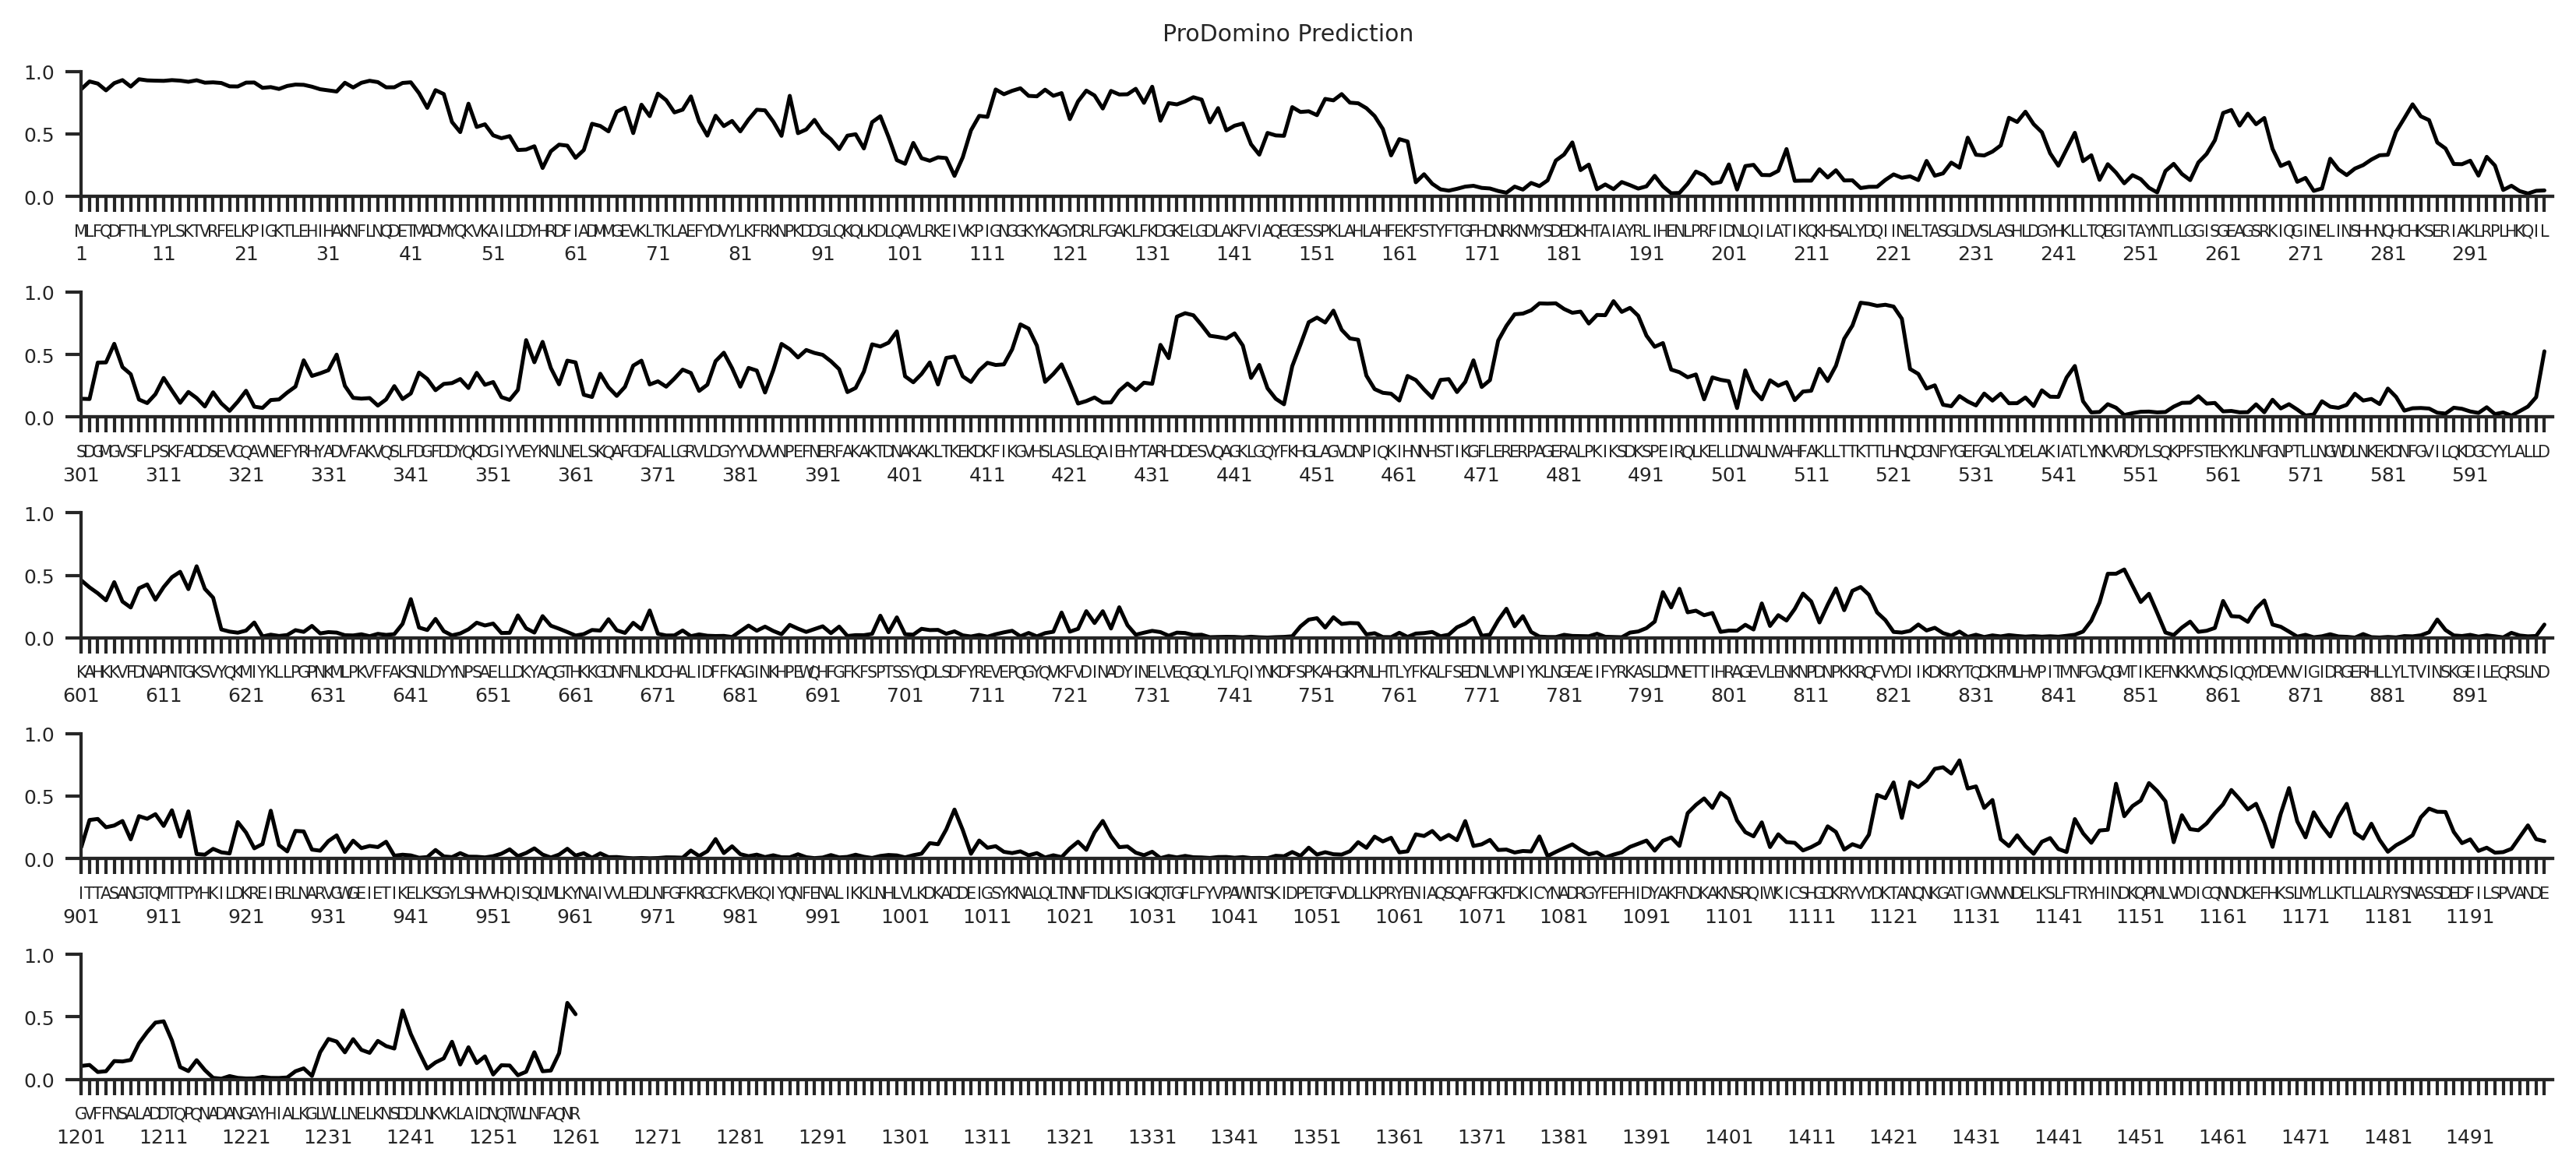

In [9]:
pred.add_sequence(seq)
pred.show_trace(show_top_hits=False)

In [ ]:
pred.add_pdb_file(structure,shift=0,chain_id='A')
pred.generate_insertion_site_pdb_file()
pred.show_pdb()

### Saving

In [ ]:
from Bio.PDB import PDBParser, PDBIO

output_path = ''
pdbio = PDBIO()
pdbio.set_structure(pred.pdb)
name = 'File_name'
os.makedirs(os.path.join(output_path,name),exist_ok=True)
pdbio.save(os.path.join(output_path,name,f'{name}.pdb'))
np.save(os.path.join(output_path,name,f'{name}.npy'),pred.predicted_sites)